## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [4]:
n_rows = df.shape[0]
n_rows

294478

c. The number of unique users in the dataset.

In [5]:
n_unique_users = df.user_id.nunique()
n_unique_users

290584

d. The proportion of users converted.

In [6]:
n_converted = df.query("converted == 1").user_id.nunique()
n_converted

35173

In [7]:
prop_converted = n_converted / n_unique_users
print("{:.2%}".format(prop_converted))

12.10%


e. The number of times the `new_page` and `treatment` don't match.

In [8]:
df_no_match_treatment_new_page = df.query("group == 'treatment' and landing_page != 'new_page' or " +
                                         "group != 'treatment' and landing_page == 'new_page'")
n_no_match_treatment_new_page = df_no_match_treatment_new_page.user_id.nunique()
n_no_match_treatment_new_page

3893

f. Do any of the rows have missing values?

In [9]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2 = df.drop(index=df_no_match_treatment_new_page.index)
df2.shape[0] + n_no_match_treatment_new_page == df.shape[0]

True

In [11]:
n_rows = df2.shape[0]
n_rows

290585

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
n_unique_users = df2.user_id.nunique()
n_unique_users

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2[df2.duplicated(subset=['user_id'])].user_id.values

array([773192])

c. What is the row information for the repeat **user_id**? 

In [15]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2.drop_duplicates(subset=['user_id'], inplace=True)
(df2.shape[0] == n_rows - 1) == (df2.user_id.nunique() == n_unique_users)

True

In [17]:
n_rows = df2.shape[0]
n_rows

290584

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
proba_conversion = df2.converted.mean()
proba_conversion

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
proba_conversion_control = df2.query("group =='control'").converted.mean()
proba_conversion_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
proba_conversion_treatment = df2.query("group =='treatment'").converted.mean()
proba_conversion_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [21]:
proba_new_page = df2.query("landing_page =='new_page'").user_id.count() / df2.shape[0]
proba_new_page

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer**

**There is no sufficient evidence that the new page leads to more conversions**, because the conversation rates for the old and new page are very similar. Approx. 50% percent of the individuals received a new landing page. Hence, 50% received the old page. Only individuals within the control receive the old page and only individuals in the treatment group receive the new page. Individuals regardless of the page they received converted about approx. 11.96 %. Individuals within the control group only received the old page and converted approx. 12.04%. Individuals within the treatment group only received the new page and converted approx. 11.88%. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} - p_{old} \leq 0 $$
$$H_1: p_{new} - p_{old} \gt 0$$

**Null Hypothesis: The new version is equal, not better or even worse, than the old version. <br>
Alternative Hypothesis: The new version is better than the old version.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [22]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [23]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [24]:
n_new = df2.query("group == 'treatment'").user_id.nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [25]:
n_old = df2.query("group == 'control'").user_id.nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted = np.random.binomial(n_new, p_new, 10000) / n_new
new_page_converted

array([ 0.11875301,  0.11900764,  0.1202739 , ...,  0.12156768,
        0.12054229,  0.11829881])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.binomial(n_old, p_old, 10000) / n_old
old_page_converted

array([ 0.11920922,  0.11980809,  0.12101271, ...,  0.11950521,
        0.1179633 ,  0.11975302])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
# For observed differences use df2
obs_diff = df2.query("group == 'treatment'").converted.mean() - df2.query("group == 'control'").converted.mean()
obs_diff

-0.0015782389853555567

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [29]:
p_diffs = new_page_converted - old_page_converted 
p_diffs

array([-0.00045621, -0.00080045, -0.00073881, ...,  0.00206247,
        0.00257899, -0.00145421])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

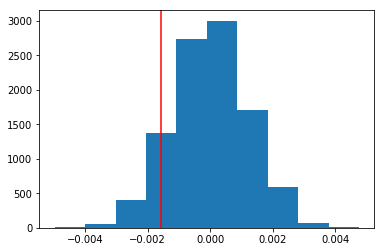

In [30]:
# create distribution under the null hypothesis
plt.hist(p_diffs);
# plot line for observed statistic
plt.axvline(obs_diff, color='r');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
# P value
p_val = (p_diffs > obs_diff).mean()
p_val

0.90280000000000005

In [32]:
std_obs_diff = np.std(p_diffs)
std_obs_diff

0.0012188000891493595

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer**

In part j. the p-value has been calculated based on the proportion of simulate difference values that are considered more extreme based on the alternative hypothesis. Therefore, the observed difference ($p_{new}$ - $p_{old}$) as statistic under the null hypothesis was used. The p-value shows the probability of observing the statistic or one more extreme in favor of the alternative, if the null is true. The p-value is approx. 0.9 and hereby greater than $\alpha$ (type I error threshold; 0.05 = 5%), which means we failed to reject the null hypothesis. This means there is no statistically significance that the new landing page leads to a higher conversion rate.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm

convert_old = df2.query("group == 'control'").converted.sum()
convert_new = df2.query("group == 'treatment'").converted.sum()
n_old = df2.query("group == 'control'").user_id.nunique()
n_new = df2.query("group == 'treatment'").user_id.nunique()
print(convert_old, convert_new)
print(n_old, n_new)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


17489 17264
145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [34]:
z_score, p_val2 = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='larger')
z_score, p_val2

(1.3109241984234394, 0.094941687240975514)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [35]:
from scipy.stats import norm

# Significance of z_score
z_cdf = norm.cdf(z_score)
z_cdf

0.90505831275902449

In [36]:
# Critical value based on 95% confidence interval, alpha = 5%
critical_value_conf_interval = norm.ppf(.95)
critical_value_conf_interval

1.6448536269514722

**Answer**

The p-value is approx. about 0.9, which equals what was calculated in j. based on the previously simulations. Thus, the p-value is greated than .05 / 5% alpha (type I error threshold) and we failed to reject the null hypothesis. Using the percent point function, in a confidence interval of 95% the critical value is approx. 1.64. The z-score of approx. 1.31 is less than this  critical value and falls into the range of the 95% confidence level. Thus, we failed to to reject the the null hypothesis. There is no statistically significance that the new landing page leads to a higher conversion rate. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer**

Logistic Regression should be used, because we want to answer if the new landing page is statistically significant for predicting the conversion rate.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2.group, drop_first=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [38]:
log_model = sm.Logit(df2.converted, df2[['intercept', 'ab_page']])
results = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-04-08 13:08 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer**

The p-value associated with ab_page is 0.1899. It differs, because as baseline the control group, respectively old page conversation rate is used. The hypothesis uses equal and not equals instead of less equal than and greater than for null and alternative hyptothesis.

$$H_0: p_{new} - p_{old} = 0 $$
$$H_1: p_{new} - p_{old} \neq 0$$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**

So far the analysis is just based on the page an individual received (one explanatory variable). The analysis would benefit, if we would consider additional explanatory variables, e.g. the timestamp, to predict the response (converted). The number of unique users assigned to either control or treatment group should be equal. Other factors to be considered in general depending on the analysis:
1. It should be ensured that there is a linear relationship between response and explanatory variables.
1. Correlation error should be accounted when data ia frequently collected over time.
1. Outliers that bar efar away from the data trend could influence the results. 
1. There could be multi-collinearity, which means explanatory variables correlate with one another. 
1. Adding higher order terms (e.g. quadratic) or interaction terms to the model. These terms can help to fit more complex relationships but they take away the ease of interpreting coefficients.



g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [41]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
user_id    290584 non-null int64
country    290584 non-null object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


In [42]:
countries_df.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [43]:
countries_df.user_id.nunique() == df2.user_id.nunique()

True

In [44]:
countries_df2 = pd.get_dummies(countries_df)
countries_df2.set_index('user_id', inplace=True)
countries_df2.head()

,country_CA,country_UK,country_US
user_id,,,
834778,0,1,0
928468,0,0,1
822059,0,1,0
711597,0,1,0
710616,0,1,0


In [45]:
countries_df2.sum()

country_CA     14499
country_UK     72466
country_US    203619
dtype: int64

In [46]:
countries_df2.drop(columns=['country_US'], axis=1, inplace=True)
df3 = df2.join(countries_df2, on='user_id')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country_CA,country_UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,0


In [47]:
log_model2 = sm.Logit(df3.converted, df3[['intercept', 'ab_page', 'country_CA', 'country_UK']])
results2 = log_model2.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-04-08 13:09 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
country_CA   -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
country_UK    0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

In [48]:
1/np.exp(-1.9893)

7.310414680563591

In [49]:
1/np.exp(-0.0149)

1.0150115583846535

In [50]:
1/np.exp(-0.0408)

1.0416437559600236

In [51]:
np.exp(0.0099)

1.0099491671175422

**Conclusion** 

Baseline: Individual located in the US and part of the control group that receives the old landing page.

Result interpretation based on the coefficients:
* Individuals located in the US receiving the new landing page are approx. equally likely to have a higher conversation rate than if they receive the old landing page.
* Individuals located in CA receiving the old landing page are approx. equally likely to have a higher conversation rate than if they are located in the US.
* Individuals located in UK receiving the old landing page are approx. equally likely to have a higher conversation rate than if they are located in the US.

Result interpretation based on the p-value:
For all explanatory variables the p-value is higher than the $\alpha$ of .05 and the p-value is outsides the confidence intervals. Hence, the variables are not statistically significant and it failed to reject the null hypothesis. The new landing page did not resulted into a higher conversation rate based on this model.


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [52]:
# Create a true copy of df3
df4 = df3.copy(deep=True)
# Add a colum where treatment, new_page and UK is True
df4['ab_page_UK'] = df4.ab_page * df4.country_UK
# Add a colum where treatment, new_page and CA is True
df4['ab_page_CA'] = df4.ab_page * df4.country_CA
df4.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country_CA,country_UK,ab_page_UK,ab_page_CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,0,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,0,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,0,0,0


In [53]:
log_model3 = sm.Logit(df4.converted, df4[['intercept', 'ab_page_UK', 'ab_page_CA']])
results3 = log_model3.fit()
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-04-08 13:09 AIC:              212779.0384
No. Observations:   290584           BIC:              212810.7773
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9963    0.0062  -322.0487  0.0000  -2.0084  -1.9841
ab_page_UK    0.0149    0.0173     0.8617  0.3888  -0.0190   0.0488
ab_page_CA   -0.0752    0.0376    -1.9974  0.0458  -0.1489  -0.0014
==================================================================

"""

In [54]:
1/np.exp(-1.9963)

7.3617671071316195

In [55]:
np.exp(0.0149)

1.0150115583846535

In [56]:
1/np.exp(-0.0752)

1.0780997492739288

**Conclusion** 

Baseline: Individual located in the US and part of the control group that receives the old landing page.

Result interpretation based on the coefficients:
* Individuals located in the CA receiving the new landing page are approx. equally likely to have a higher conversation rate than individuals in the US receiving the old landing page.
* Individuals located in the UK receiving the new landing page are approx. equally likely to have a higher conversation rate than individuals in the US receiving the old landing page.

Result interpretation based on the p-value:
For all explanatory variables the p-value is higher than the $\alpha$ of .05 and the p-value is outsides the confidence intervals. Hence, the variables are not statistically significant and it failed to reject the null hypothesis. The new landing page did not resulted into a higher conversation rate based on this model.


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0